# Datetime variables

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Datetime variables take dates and / or time as values. For example, date of birth ('29-08-1987', '12-01-2012'), or date of application ('2016-Dec', '2013-March'). Datetime variables can contain dates only, times only, or dates and time.

We don't use datetime variables straightaway in machine learning because:

- They contain a huge number of different values.
- We can extract much more information from datetime variables by preprocessing them correctly.

Furthermore, date variables frequently include dates that were absent from the dataset used to train the machine learning model. In fact, date variables are frequently used to store dates that are in the future in comparison to the dates in the training dataset. As a result, because they were never seen while being trained, the machine learning model will have no idea what to do with the new values.

=============================================================================

## In this demo: Peer-to-peer lending (Finance)

In this demo, we will use a toy data set that simulates data from a peer-to-peer finance company.

To obtain the data, go to the lecture **Download datasets** in **Section 2**. This is a toy dataset that I created and comes within the Datasets.zip file that you can find in this lecture.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Let's load the dataset.

# Variable definitions:
#-------------------------
# disbursed amount: loan amount lent to the borrower
# market: risk band in which borrowers are placed
# date_issued: date the loan was issued
# date_last_payment: date of last payment towards repyaing the loan

data = pd.read_csv('../Datasets/loan.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   disbursed_amount        10000 non-null  float64
 2   interest                10000 non-null  float64
 3   market                  10000 non-null  object 
 4   employment              9389 non-null   object 
 5   time_employed           9471 non-null   object 
 6   householder             10000 non-null  object 
 7   income                  10000 non-null  float64
 8   date_issued             10000 non-null  object 
 9   target                  10000 non-null  int64  
 10  loan_purpose            10000 non-null  object 
 11  number_open_accounts    10000 non-null  float64
 12  date_last_payment       10000 non-null  object 
 13  number_credit_lines_12  238 non-null    float64
dtypes: float64(5), int64(2), object(7)
memo

In [5]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [3]:
# Pandas assigns type 'object' to dates 
# when loading from csv.

# Let's have a look:

data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

Both **date_issued** and **date_last_payment** are cast as objects. Therefore, pandas will treat them as strings.

To tell pandas that they are datetime variables, we need to re-cast them into datetime format.

In [7]:
# Let's parse the dates into datetime format.
# This will allow us to make some analysis afterwards.

data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])

data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


In [8]:
# Let's extract the month and the year from the 
# datetime variable to make plots.

data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year

In [10]:
data.groupby(['year', 'month', 'market'])['disbursed_amount'].sum()

year  month  market
2007  7      A            1820.00
      8      E           18600.00
      9      E           19432.25
      10     E           14256.00
      12     B            2796.50
                          ...    
2015  12     A         1094781.50
             B         1775188.00
             C         1941545.75
             D         1083162.50
             E          871467.50
Name: disbursed_amount, Length: 415, dtype: float64

Text(0, 0.5, 'Disbursed Amount')

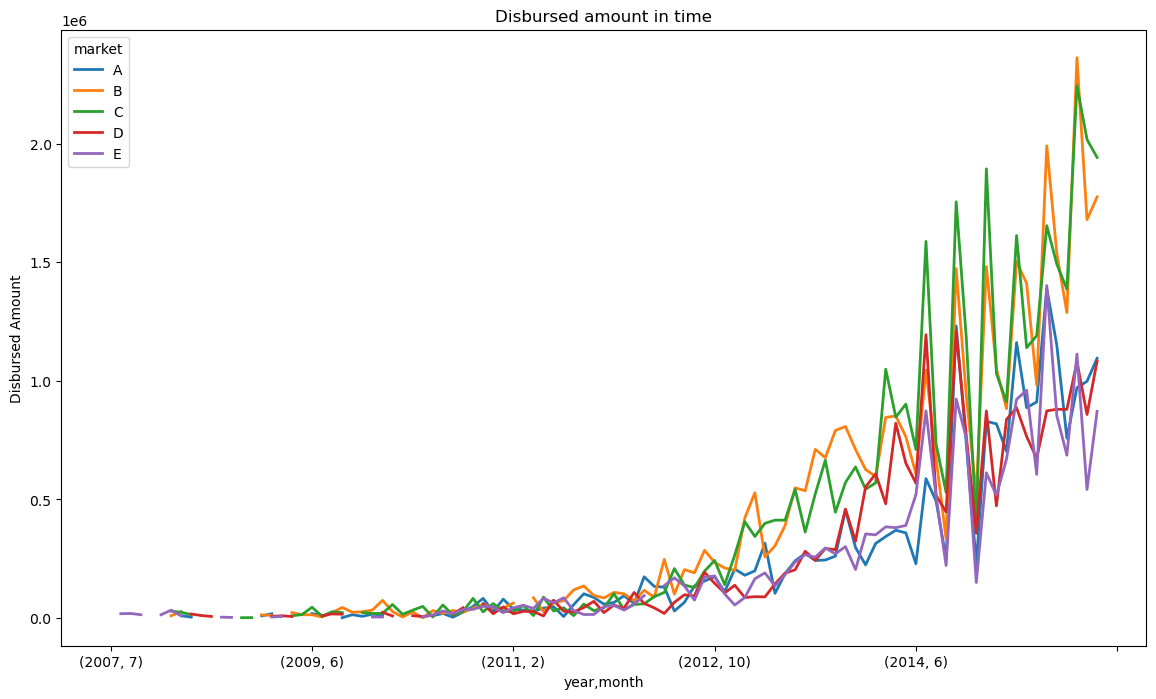

In [12]:
# Let's see how much money has been disbursed
# over the years to the different risk
# markets (grade variable).

fig = data.groupby(['year', 'month', 'market'])['disbursed_amount'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')

This toy finance company seems to have increased the amount of money lent from 2012 onwards. The tendency indicates that they will continue to grow. In addition, we can see that their major business comes from lending money to C and B-grade borrowers.

A grades are given to the lowest-risk borrowers; these are the borrowers who are most likely to repay their loans because they are in a better financial situation. Borrowers within this grade are charged lower interest rates.

Riskier borrowers represent the D and E grades. Borrowers who are in a slightly tighter financial situation or who do not have enough financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

**That is all for this demonstration. I hope you enjoyed the notebook, and I'll see you in the next one.**